In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
%matplotlib inline

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(np.isnan(x_train).any())
print(np.isnan(x_test).any())

False
False


In [ ]:
input_shape = (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

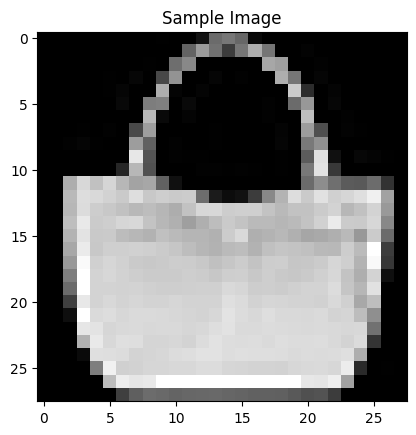

Label (one-hot): [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
plt.imshow(x_train[100][:,:,0], cmap='gray')
plt.title("Sample Image")
plt.show()
print("Label (one-hot):", y_train[100].numpy())

In [ ]:
batch_size = 64
num_classes = 10
epochs = 10

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
callbacks = myCallback()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 347s 409ms/step - acc: 0.7201 - loss: 0.7980 - val_acc: 0.8775 - val_loss: 0.3393
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 382s 409ms/step - acc: 0.8734 - loss: 0.3539 - val_acc: 0.8938 - val_loss: 0.2843
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 343s 406ms/step - acc: 0.8904 - loss: 0.3046 - val_acc: 0.9085 - val_loss: 0.2477
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 339s 401ms/step - acc: 0.9000 - loss: 0.2808 - val_acc: 0.9097 - val_loss: 0.2468
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 383s 403ms/step - acc: 0.9063 - loss: 0.2689 - val_acc: 0.9145 - val_loss: 0.2295
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 372s 391ms/step - acc: 0.9063 - loss: 0.2623 - val_acc: 0.9158 - val_loss: 0.2430
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 390s 401ms/step - acc: 0.9111 - loss: 0.2555 - val_acc: 0.9133 - val_loss: 0.2350
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 379s 397ms/step - acc: 0.9107 - loss: 0.2555 - val_acc: 0.9147 - val_loss: 0.2369
Epoch 9/10
844/844 ━━━━━

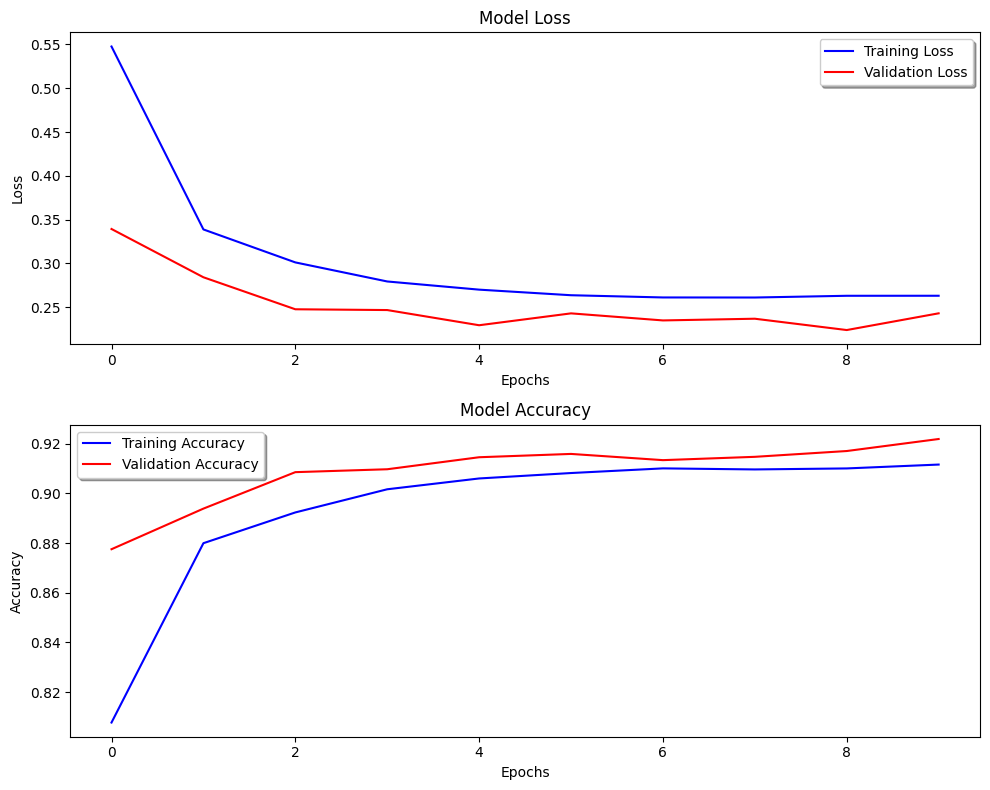

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r', label="Validation Accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - acc: 0.9089 - loss: 0.2710
Test Accuracy: 0.9101 | Test Loss: 0.2616


In [ ]:
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step


In [ ]:
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

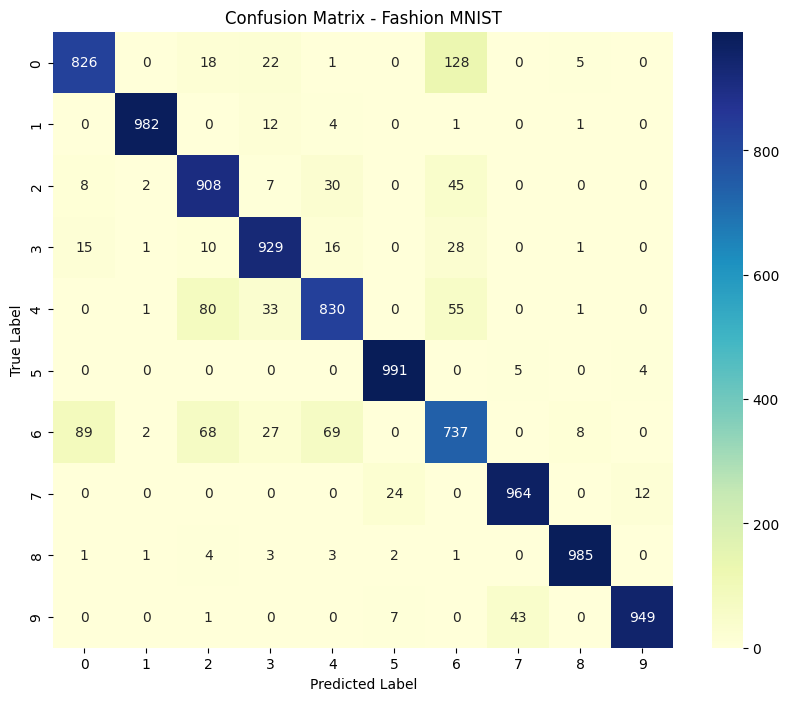

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()